## How good is the strategy?

#### Import packages

In [1]:
# import data packages
import pandas as pd
import numpy as np
from scipy.stats import t as t_test
import datetime
import matplotlib.pyplot as plt

In [2]:
#import all bets:
all_bets = pd.read_csv('analysis/results/all_bets2.csv', index_col=0)

In [3]:
ave_bet = 500 / all_bets['Price'].mean()
bets_per_day = 20
daily_bet = bets_per_day * ave_bet
print(f'average money we ar betting per day: {daily_bet}')
returns = .05
daily_profit = daily_bet * returns
print(f'average profit per day: {daily_profit}')
yearly_profit = daily_profit * 365
print(f'average yearly profit: {yearly_profit}')

average money we ar betting per day: 1688.6305004520168
average profit per day: 84.43152502260085
average yearly profit: 30817.50663324931


In [17]:
#lets look at all the column names of all bets:
all_bets

,Datetime,Horse,Type,Location,Price,Midpoint Price,Amount,Venue,Midpoint Percentage,WIN_LOSE,...,Turnover,Expected Value,midpoint turnover,profit/loss,winnings,kelly,implied_probability,price_group,aus_horse_race,betr difference
0,2023-01-04,Big Time Brynley,RaceType.GREYHOUND_RACE,AUS,1.8,1.734172,1.00,Manawatu,0.963429,0,...,97.444200,-0.025558,0.938806,-1.0,0.0,0.0,0.555556,1-2,0,0.047211
1,2023-01-04,Gable,RaceType.GREYHOUND_RACE,AUS,7.0,6.830769,1.00,Gawler,0.975824,0,...,157.743532,0.577435,1.539300,-1.0,0.0,0.0,0.142857,6-8,0,-2.562417
2,2023-01-04,Chilli On Ice,RaceType.GREYHOUND_RACE,AUS,8.5,8.597143,1.00,Gawler,1.011429,1,...,85.000000,-0.150000,0.859714,7.5,8.5,8.5,0.117647,8-10,0,1.500000
3,2023-01-04,Tabasco Lad,RaceType.GREYHOUND_RACE,AUS,2.6,2.542143,1.00,The Meadows,0.977747,0,...,116.071429,0.160714,1.134885,-1.0,0.0,0.0,0.384615,2-4,0,-0.360000
4,2023-01-04,Little Olivia,RaceType.GREYHOUND_RACE,AUS,4.8,4.415385,1.00,Taree,0.919872,0,...,151.625486,0.516255,1.394760,-1.0,0.0,0.0,0.208333,4-6,0,-1.634305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2023-01-29,Tracer Bullet,RaceType.TROT_RACE,AUS,9.0,8.200000,1.10,Redcliffe,0.911111,0,...,82.519085,-0.174809,0.751841,-1.0,0.0,0.0,0.111111,8-10,0,1.906568
915,2023-01-29,My Mate Neo,RaceType.GREYHOUND_RACE,AUS,3.8,3.575000,2.65,Warragul,0.940789,0,...,133.536327,0.335363,1.256296,-1.0,0.0,0.0,0.263158,2-4,0,-0.954332
916,2023-01-29,Bigsy,RaceType.GREYHOUND_RACE,AUS,9.0,8.050000,1.10,Warragul,0.894444,0,...,79.849403,-0.201506,0.714209,-1.0,0.0,0.0,0.111111,8-10,0,2.271218
917,2023-01-29,Get To Work,RaceType.GREYHOUND_RACE,AUS,6.5,6.098361,1.55,Richmond,0.938209,0,...,118.181818,0.181818,1.108793,-1.0,0.0,0.0,0.153846,6-8,0,-1.000000


#### Manipualte base data

In [24]:
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['profit/loss'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1) - 1, -1)
all_bets['winnings'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1), 0)
all_bets['kelly'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1), 0)
all_bets['implied_probability'] = 1 / all_bets['Price']
#let's filter the data to only observations where the price > midpoint price:
midpoint_strat_profit = all_bets[all_bets['Price'] > all_bets['Midpoint Price']]
profit = sum(all_bets['profit/loss'])
winnings = sum(all_bets['winnings'])
returns = profit / len(all_bets) * 100

# let's group the data by characteristics and see if there is a difference in key metrics:
location_returns = all_bets.groupby('Location')['profit/loss'].sum()
location_returns_n = all_bets.groupby('Location')['Horse'].count()
location_returns_t = all_bets.groupby('Location')['Turnover'].mean()
location_returns_amount = all_bets.groupby('Location')['Amount'].sum()
location_returns = pd.DataFrame(location_returns.sort_values(ascending=False)).merge(location_returns_n, left_index=True, right_index=True)
location_returns = location_returns.merge(location_returns_t, left_index=True, right_index=True)
location_returns = location_returns.merge(location_returns_amount, left_index=True, right_index=True)

venue_returns = all_bets.groupby('Venue')['profit/loss'].sum()
venue_returns_n = all_bets.groupby('Venue')['Horse'].count()
venure_returns_t = all_bets.groupby('Venue')['Turnover'].mean()
venue_returns = pd.DataFrame(venue_returns.sort_values(ascending=False)).merge(venue_returns_n, left_index=True, right_index=True)
venue_returns = venue_returns.merge(venure_returns_t, left_index=True, right_index=True)

race_type_returns = all_bets.groupby('Type')['profit/loss'].sum()
race_type_returns_n = all_bets.groupby('Type')['Horse'].count()
race_type_returns_t = all_bets.groupby('Type')['Turnover'].mean()
race_type_returns_amount = all_bets.groupby('Type')['Amount'].sum()
race_type_returns = pd.DataFrame(race_type_returns.sort_values(ascending=False)).merge(race_type_returns_n, left_index=True, right_index=True)
race_type_returns = race_type_returns.merge(race_type_returns_t, left_index=True, right_index=True)
race_type_returns = race_type_returns.merge(race_type_returns_amount, left_index=True, right_index=True)

aus_type_returns = all_bets.groupby(['Location', 'Type'])['profit/loss'].sum()
aus_type_returns_n = all_bets.groupby(['Location', 'Type'])['Horse'].count()
aus_type_returns_t = all_bets.groupby(['Location', 'Type'])['Turnover'].mean()
aus_type_returns_amount = all_bets.groupby(['Location', 'Type'])['Amount'].sum()
aus_type_returns = pd.DataFrame(aus_type_returns.sort_values(ascending=False)).merge(aus_type_returns_n, left_index=True, right_index=True)
aus_type_returns = aus_type_returns.merge(aus_type_returns_t, left_index=True, right_index=True)
aus_type_returns = aus_type_returns.merge(aus_type_returns_amount, left_index=True, right_index=True)



In [27]:
# let's group the data by price and see if there is a difference in profit/loss and turnover by price:
conditions = [(all_bets['Price'] >= 1) & (all_bets['Price'] < 2),
                (all_bets['Price'] >= 2) & (all_bets['Price'] < 4),
                (all_bets['Price'] >= 4) & (all_bets['Price'] < 6),
                (all_bets['Price'] >= 6) & (all_bets['Price'] < 8),
                (all_bets['Price'] >= 8) & (all_bets['Price'] < 10),
                (all_bets['Price'] >= 10) & (all_bets['Price'] < 12),
                (all_bets['Price'] >= 12) & (all_bets['Price'] < 14),
                (all_bets['Price'] >= 14) & (all_bets['Price'] < 16),
                (all_bets['Price'] >= 16) & (all_bets['Price'] < 18),
                (all_bets['Price'] >= 18) & (all_bets['Price'] < 20),
                (all_bets['Price'] >= 20)]

price_group = ["1-2", "2-4", "4-6", "6-8", "8-10", "10-12", "12-14", "14-16", "16-18", "18-20", "20+"]

all_bets['price_group'] = np.select(conditions, price_group)

price_type_returns = all_bets.groupby('price_group')['profit/loss'].sum()
price_type_returns_n = all_bets.groupby('price_group')['Horse'].count()
price_type_returns_t = all_bets.groupby('price_group')['Turnover'].mean()
price_type_returns_amount = all_bets.groupby('price_group')['Amount'].sum()
price_type_returns = pd.DataFrame(price_type_returns).merge(price_type_returns_n, left_index=True, right_index=True)
price_type_returns = price_type_returns.merge(price_type_returns_t, left_index=True, right_index=True)
price_type_returns = price_type_returns.merge(price_type_returns_amount, left_index=True, right_index=True)

#### How good are our bets thus far?

In [28]:
print(f'From a total of {len(all_bets)} bets, betting $1 on every horse yielded a total profit of: ${profit}')
print(f'This equates to a return on investment (${len(all_bets)} base investment) of: {round(returns, 3)} percent.')

display(aus_type_returns)
display(location_returns)
display(price_type_returns)
display(race_type_returns)
display(venue_returns)

From a total of 919 bets, betting $1 on every horse yielded a total profit of: $-41.24999999999998
This equates to a return on investment ($919 base investment) of: -4.489 percent.


profit/loss  Horse    Turnover  Amount
Location Type                                                           
AUS      RaceType.GREYHOUND_RACE        13.10    401  103.873811  718.85
         RaceType.TROT_RACE             -1.80    208  105.061050  307.70
         RaceType.HORSE_RACE            -5.90    219  105.502752  282.95
USA      RaceType.HORSE_RACE           -46.65     91  106.965810  116.50

,profit/loss,Horse,Turnover,Amount
Location,,,,
AUS,5.40,828,104.602898,1309.5
USA,-46.65,91,106.965810,116.5


,profit/loss,Horse,Turnover,Amount
price_group,,,,
1-2,5.40,33,101.688393,66.60
10-12,-30.00,140,108.201741,140.00
2-4,-41.25,205,102.765885,466.05
4-6,-38.90,238,104.118751,391.95
6-8,0.50,183,108.731819,229.55
8-10,63.00,120,100.799460,131.85


,profit/loss,Horse,Turnover,Amount
Type,,,,
RaceType.GREYHOUND_RACE,13.10,401,103.873811,718.85
RaceType.TROT_RACE,-1.80,208,105.061050,307.70
RaceType.HORSE_RACE,-52.55,310,105.932230,399.45


,profit/loss,Horse,Turnover
Venue,,,
Townsville,12.80,14,105.807018
Healesville,12.15,17,110.675568
Horsham,11.90,5,128.539398
Shepparton,11.55,18,103.091890
Moonee Valley,10.60,4,105.508152
...,...,...,...
Taree,-9.45,11,115.548936
Redcliffe,-12.30,23,102.131201
Geelong,-15.90,29,105.225036


In [7]:
all_bets['aus_horse_race'] = np.where((all_bets['Location'] == 'AUS') & (all_bets['Type'] == 'RaceType.HORSE_RACE'), 1, 0)
aus_horse_returns_p = all_bets.groupby('aus_horse_race')['profit/loss'].sum()
aus_horse_returns_t = all_bets.groupby('aus_horse_race')['Turnover'].mean()
aus_horse_n = all_bets.groupby('aus_horse_race')['Horse'].count()
aus_horse_returns = pd.DataFrame(aus_horse_returns_p).merge(aus_horse_n, left_index=True, right_index=True)
aus_horse_returns = aus_horse_returns.merge(aus_horse_returns_t, left_index=True, right_index=True)
aus_horse_returns



,profit/loss,Horse,Turnover
aus_horse_race,,,
0,-35.35,700,104.628550
1,-5.90,219,105.502752


### Unlucky, or BSP not all its cracked up to be?

2.204167908497189
0.19996469208846923
0.04836874675607339


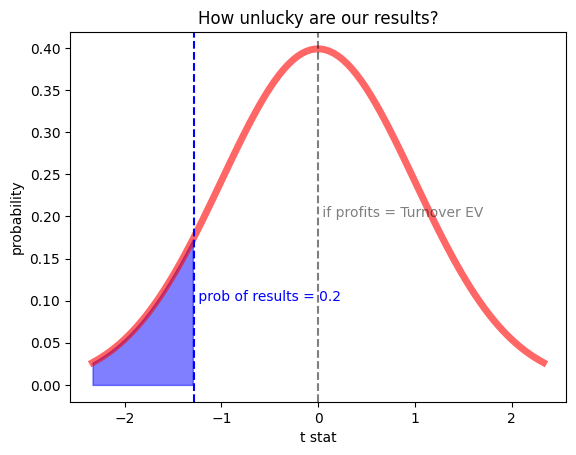

In [59]:
mean = all_bets['profit/loss'].mean()
sigma = all_bets['profit/loss'].std()
print(sigma)
n = len(all_bets)
dof = n -1
mu = (all_bets['Turnover'].mean() / 100) - 1
#t test:
t = (mean - mu) / (sigma / np.sqrt(n))
t_test.cdf(t, dof)
p_value = 2*(1 - t_test.cdf(abs(t), dof))
print(p_value)
print(mu)
# now we plot out a t distribution centering on the mean of our sample:
x = np.linspace(t_test.ppf(0.01, dof), t_test.ppf(0.99, dof), 100)
plt.plot(x, t_test.pdf(x, dof), 'r-', lw=5, alpha=0.6, label='t pdf')
#lets add a vertical line at p_value:
plt.axvline(x=t, color='b', linestyle='--', label='t value')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
#let's label the vertical line:
plt.text(t, 0.1, f' prob of results = {round(p_value, 3)}', color = 'b')
plt.text(0, 0.2, f' if profits = Turnover EV', alpha = 0.5)
# let's colour the area under the curve to the left of the t value:
plt.fill_between(x, t_test.pdf(x, dof), where=x<t, color='b', alpha=0.5)
plt.title('How unlucky are our results?')
plt.xlabel('t stat')
plt.ylabel('probability')
plt.show()

#### Simulating risk 
assumptions:
we take a sample from some distribution of bets following our rule - some will lose, some will win with some distribution. 
The mean profit/loss of that sample (if all equal weighted bets) will follow a normal distribution from the C.L.T. 


#### How indicative of the BSP is the midpoint price?

On average the midpoint price is $-827.357 off from the BSP


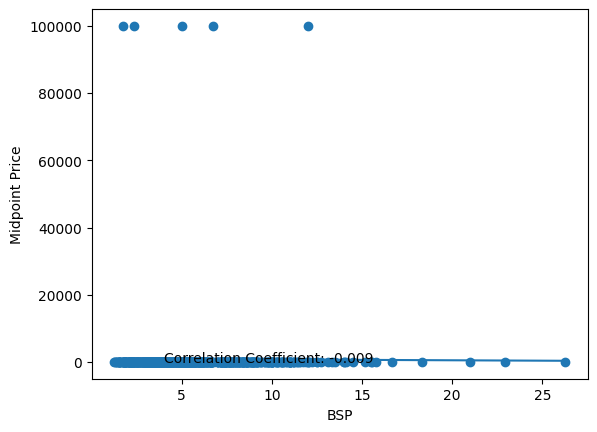

In [8]:
# Let's calculate how far off the midpoint price is from BSP
all_bets['midpoint difference'] = all_bets['BSP'] - all_bets['Midpoint Price']
sum(all_bets['midpoint difference'])

# lets plot the correlation of the BSp with the midpoint price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Midpoint Price'])
plt.xlabel('BSP')
plt.ylabel('Midpoint Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Midpoint Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Midpoint Price"])[0,1], 3)}')
print(f'On average the midpoint price is ${round(np.mean(all_bets["midpoint difference"]), 3)} off from the BSP')

#### How indicative of the BSP is the Betr price?

On average the betr price is $0.046 off from the BSP


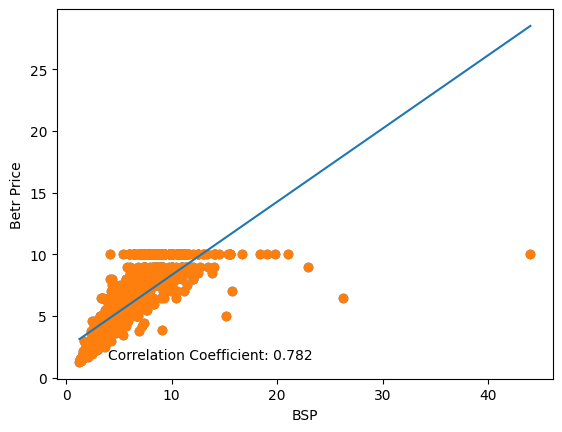

In [9]:
all_bets['betr difference'] = all_bets['BSP'] - all_bets['Price']
sum(all_bets['betr difference'])

# lets plot the correlation of the BSP with the price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.xlabel('BSP')
plt.ylabel('Betr Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Price"])[0,1], 3)}')
print(f'On average the betr price is ${round(np.mean(all_bets["betr difference"]), 3)} off from the BSP')

#### How good would of betting with the Kelly Criterion been?

Thus far we have assumed we made \\$1 bets for every horse - but what if the bet size was a function of the implied probability we derive from the price. The below code sees how well we would of done using the kelly criterion for stake sizes assuming we initially placed \\$100 in. 

Text(0, 1200, 'initial stake: $100')

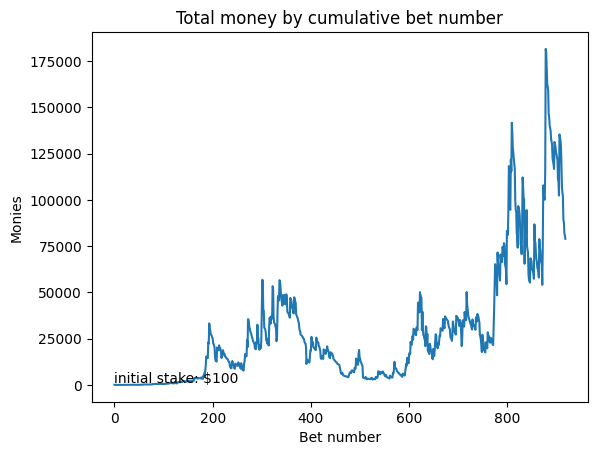

In [10]:
initial_stake = 100
bets = len(all_bets)
monies_array = [initial_stake]

def kelly_fraction(prob, prop_bet_gained):
  return ((prob) - ((1 - prob)) / prop_bet_gained) # need to check correct formula two sites differerd.

for bet in range(1,bets):
    index = bet - 1 
    prob = all_bets['implied_probability'][index]
    price = all_bets['Price'][index]
    prop_bet_gained = (price*1) /1
    kelly_frac = kelly_fraction(prob, prop_bet_gained)
    kelly = kelly_frac * monies_array[-1]

    if all_bets['WIN_LOSE'][index] == 1:
        total_purse = monies_array[-1] + (price * kelly)
        monies_array.append(total_purse)
    else:
        total_purse = monies_array[-1] - (kelly)
        monies_array.append(total_purse)

plt.plot(monies_array)
#lets add axis titles and labels:
plt.xlabel('Bet number')
plt.ylabel('Monies')
plt.title('Total money by cumulative bet number')
plt.text(0, 1200, f'initial stake: ${initial_stake}')

### *below is Ben playing around*

#### Profit from all bets- assuming BSP is long run probability. 

In [ ]:
print(f'From a total of ({len(all_bets)} bets) the overall turnover for all our bets is: {all_bets.Turnover.mean()}.')
print(f'This would equate to a profit of {round(all_bets.Turnover.mean() * 100 - 100, 3)} percent- (assuming BSP is accurate in long run)')



From a total of (337 bets) the overall turnover for all our bets is: 104.622361282017.
This would equate to a profit of 10362.236 percent- (assuming BSP is accurate in long run)


#### Profit if we had only bet when the price was better than the midpoint price:

In [11]:
print(f'From a total of ({len(midpoint_strat_profit)} bets) the overall turnover for all our bets is: {midpoint_strat_profit.Turnover.mean()}.')
print(f'This equates to a profit of {round(midpoint_strat_profit.Turnover.mean() * 100 - 100, 3)} percent.')

From a total of (310 bets) the overall turnover for all our bets is: 104.03934650702357.
This equates to a profit of 10303.935 percent.
